<a href="https://colab.research.google.com/github/ivondini/UTS_AnalisisBigData_Jaringan/blob/main/UTS_AnalisisBigData_Jaringan_2020_153.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARY & DATASET

Library yang digunakan :
- Pandas
- Matplotlib
- Seaborn
- Sklearn (scikit-learn)
- LabelEncoder dari sklearn.preprocessing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [13]:
# Membaca data csv
df = pd.read_csv('/content/drive/MyDrive/Analisis Big Data A/UTS_Jaringan/Jaringan-UTS.csv')

# EDA & PREPROCESSING

In [14]:
# Menampilkan data
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
1,2,0.000588,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
2,3,0.000745,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
3,4,0.001275,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
4,5,0.002002,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
...,...,...,...,...,...,...,...
253670,253671,40.319825,10.10.1.198,172.217.194.95,TLSv1.2,14068,Application Data [TCP segment of a reassembled...
253671,253672,40.336219,172.217.194.95,10.10.1.198,TCP,80,[TCP Dup ACK 253644#1] 443 > 59620 [ACK] Seq...
253672,253673,40.336219,172.217.194.95,10.10.1.198,TCP,88,[TCP Dup ACK 253644#2] 443 > 59620 [ACK] Seq...
253673,253674,40.336219,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 253644#3] 443 > 59620 [ACK] Seq...


In [15]:
# Menampilkan 5 data teratas
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
1,2,0.000588,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
2,3,0.000745,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
3,4,0.001275,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
4,5,0.002002,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record


In [16]:
# Menampilkan 5 data terbawah
df.tail()

,No.,Time,Source,Destination,Protocol,Length,Info
253670,253671,40.319825,10.10.1.198,172.217.194.95,TLSv1.2,14068,Application Data [TCP segment of a reassembled...
253671,253672,40.336219,172.217.194.95,10.10.1.198,TCP,80,[TCP Dup ACK 253644#1] 443 > 59620 [ACK] Seq...
253672,253673,40.336219,172.217.194.95,10.10.1.198,TCP,88,[TCP Dup ACK 253644#2] 443 > 59620 [ACK] Seq...
253673,253674,40.336219,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 253644#3] 443 > 59620 [ACK] Seq...
253674,253675,40.336251,10.10.1.198,172.217.194.95,TCP,2868,"59620 > 443 [PSH, ACK] Seq=474658257 Ack=273..."


In [17]:
# Cek missing value
df.isnull().sum()

No.              0
Time             0
Source           0
Destination    272
Protocol         0
Length           0
Info             0
dtype: int64

In [18]:
# Menghapus missing value
df = df.dropna()

In [19]:
# Cek missing value yang suda dihapus
df.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

In [20]:
# Menampilkan metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253403 entries, 0 to 253674
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          253403 non-null  int64  
 1   Time         253403 non-null  float64
 2   Source       253403 non-null  object 
 3   Destination  253403 non-null  object 
 4   Protocol     253403 non-null  object 
 5   Length       253403 non-null  int64  
 6   Info         253403 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 15.5+ MB


In [21]:
# Cek duplikasi data
df.duplicated().sum()

0

In [22]:
# Cek jumlah ukuran data
df.shape

(253403, 7)

In [23]:
df.nunique()

No.            253403
Time            77270
Source             15
Destination        15
Protocol            8
Length            214
Info           244697
dtype: int64

Melakukan pemilahan dataset yang memenuhi syarat yaitu 'Info' sebagai variabel Y. Sedangkan 'Ignored Unknown Record' di ibaratkan sebagai nilai kosong

In [24]:
df = df.loc[df['Info'] != 'Ignored Unknown Record']

In [25]:
# Menampilkan 5 data terasas
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
11,12,0.012721,172.217.194.95,10.10.1.198,TCP,80,443 > 59620 [ACK] Seq=1 Ack=4293526301 Win=1...
12,13,0.012747,10.10.1.198,172.217.194.95,TCP,50468,"59620 > 443 [PSH, ACK] Seq=708401 Ack=1 Win=..."
13,14,0.013069,172.217.194.95,10.10.1.198,TCP,88,[TCP Dup ACK 12#1] 443 > 59620 [ACK] Seq=1 A...
14,15,0.013069,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 12#2] 443 > 59620 [ACK] Seq=1 A...
15,16,0.013069,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 12#3] 443 > 59620 [ACK] Seq=1 A...


In [26]:
# Menampilkan 5 data terbawah
df.tail()

,No.,Time,Source,Destination,Protocol,Length,Info
253670,253671,40.319825,10.10.1.198,172.217.194.95,TLSv1.2,14068,Application Data [TCP segment of a reassembled...
253671,253672,40.336219,172.217.194.95,10.10.1.198,TCP,80,[TCP Dup ACK 253644#1] 443 > 59620 [ACK] Seq...
253672,253673,40.336219,172.217.194.95,10.10.1.198,TCP,88,[TCP Dup ACK 253644#2] 443 > 59620 [ACK] Seq...
253673,253674,40.336219,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 253644#3] 443 > 59620 [ACK] Seq...
253674,253675,40.336251,10.10.1.198,172.217.194.95,TCP,2868,"59620 > 443 [PSH, ACK] Seq=474658257 Ack=273..."


# Visualisasi Data

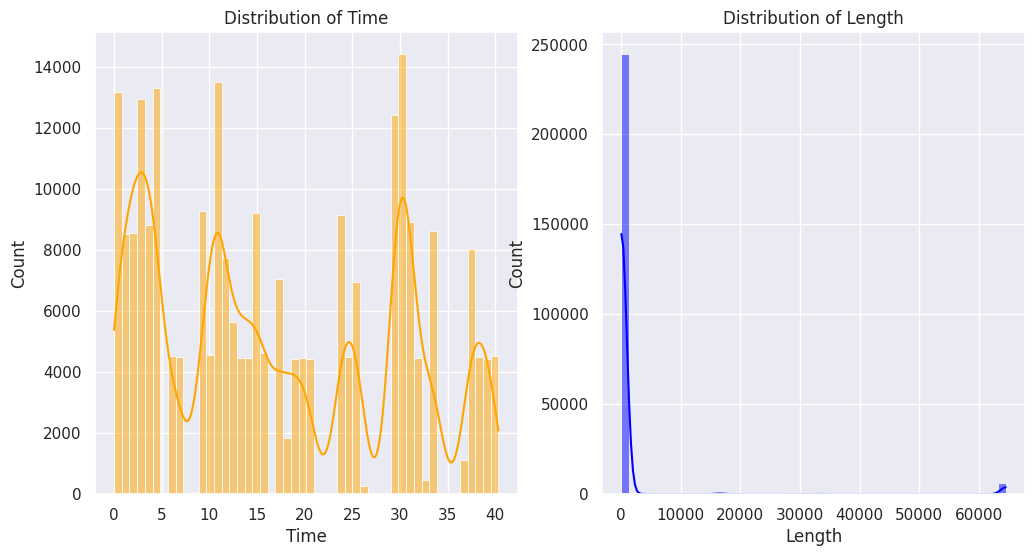

In [36]:
# Set style
sns.set(style="darkgrid")

# Plot histogram for Time
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=50, kde=True, color='orange')
plt.title('Distribution of Time')

# Plot histogram for Length
plt.subplot(1, 2, 2)
sns.histplot(df['Length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Length')

plt.show()

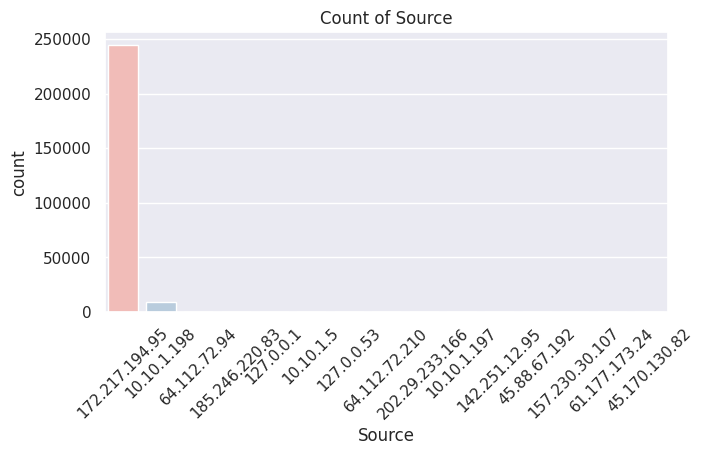

In [50]:
# Set style
sns.set(style="darkgrid")

# Plot for Source
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)

# sns.countplot(df['Source'], palette='viridis')
sns.countplot(x='Source', data=df, palette='Pastel1')
plt.title('Count of Source')
plt.xticks(rotation=45)

plt.show()

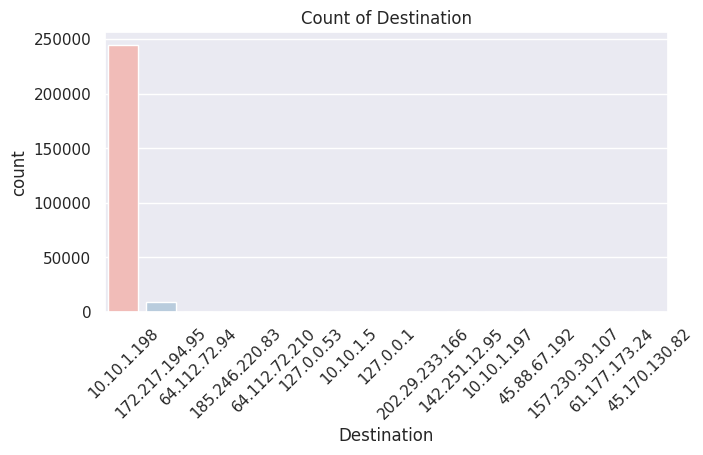

In [49]:
# Set style to darkgrid
sns.set(style="darkgrid")

# Plot for Destination
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 2)
sns.countplot(x='Destination', data=df, palette='Pastel1')
plt.title('Count of Destination')
plt.xticks(rotation=45)

plt.show()

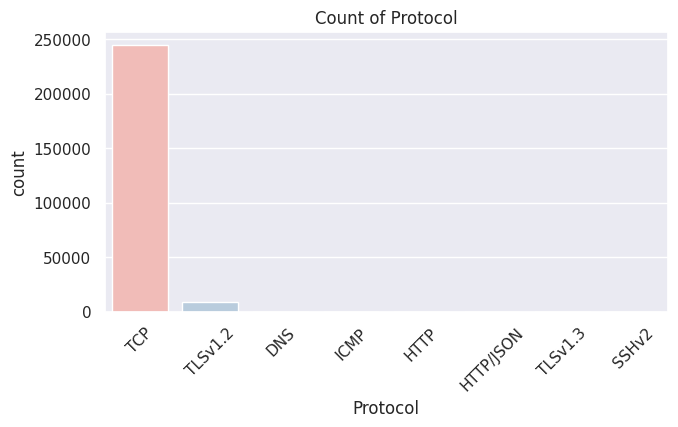

In [52]:
# Visualisasi countplot
# Set style
sns.set(style="darkgrid")
# Plot for Destination
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 2)
sns.countplot(x='Protocol', data=df, palette='Pastel1')
plt.title('Count of Protocol')
plt.xticks(rotation=45)

plt.show()

In [53]:
dfgroupby = df.groupby('Protocol').agg({'Destination' : 'count','Source' : 'count'}).reset_index()
dfgroupby

,Protocol,Destination,Source
0,DNS,11,11
1,HTTP,56,56
2,HTTP/JSON,44,44
3,ICMP,1,1
4,SSHv2,2,2
5,TCP,244680,244680
6,TLSv1.2,8521,8521
7,TLSv1.3,8,8


In [54]:
dfgroupby2 = df.groupby([ 'Protocol', 'Source', 'Destination',]).agg({'No.' : 'count'}).reset_index()
dfgroupby2.rename(columns={'No.' :'Count'}, inplace=True)
dfgroupby2

,Protocol,Source,Destination,Count
0,DNS,10.10.1.198,10.10.1.5,3
1,DNS,10.10.1.5,10.10.1.198,2
2,DNS,127.0.0.1,127.0.0.53,3
3,DNS,127.0.0.53,127.0.0.1,3
4,HTTP,10.10.1.197,10.10.1.198,44
5,HTTP,127.0.0.1,127.0.0.1,12
6,HTTP/JSON,10.10.1.198,10.10.1.197,44
7,ICMP,127.0.0.1,127.0.0.53,1
8,SSHv2,61.177.173.24,10.10.1.198,2
9,TCP,10.10.1.197,10.10.1.198,64


# Feature Selection

In [55]:
X = df.drop('Info', axis=1)
y = df['Info'].values

In [56]:
label_encoder = LabelEncoder()
X['Source'] = label_encoder.fit_transform(X['Source'])
X['Destination'] = label_encoder.fit_transform(X['Destination'])
X['Protocol'] = label_encoder.fit_transform(X['Protocol'])
y = label_encoder.fit_transform(y)

# Spliting Data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
y_test

array([  9887,  26076, 223711, ...,  77091, 217983,  22285])

In [59]:
unique_labels_data = df['Info'].unique()
unique_labels_train = np.unique(y_train)
unique_labels_test = np.unique(y_test)

print("Unique labels in data:", len(unique_labels_data))
print("Unique labels in y_train:", len(unique_labels_train))
print("Unique labels in y_test:", len(unique_labels_test))


Unique labels in data: 244696
Unique labels in y_train: 195790
Unique labels in y_test: 48929


In [60]:
missing_labels_train = set(unique_labels_data) - set(unique_labels_train)
missing_labels_test = set(unique_labels_data) - set(unique_labels_test)

print("Missing labels in y_train:", len(missing_labels_train))
print("Missing labels in y_test:", len(missing_labels_test))

print("Example missing labels in y_train:", list(missing_labels_train)[:10])
print("Example missing labels in y_test:", list(missing_labels_test)[:10])


Missing labels in y_train: 244696
Missing labels in y_test: 244696
Example missing labels in y_train: ['[TCP Dup ACK 194648#3] 443  >  59620 [ACK] Seq=21331 Ack=363419738 Win=15371 Len=0 TSval=1478844205 TSecr=1884521649 SLE=363632538 SRE=363633938 SLE=363556938 SRE=363558338 SLE=363688338 SRE=363689738', '[TCP Dup ACK 121065#3] 443  >  59620 [ACK] Seq=12301 Ack=227295969 Win=15371 Len=0 TSval=1478828311 TSecr=1884505756 SLE=227484969 SRE=227486369 SLE=227512969 SRE=227514369 SLE=227529769 SRE=227532569', '443  >  59620 [ACK] Seq=8440 Ack=153082069 Win=15371 Len=0 TSval=1478823900 TSecr=1884501344 SLE=153345269 SRE=153346669 SLE=153325669 SRE=153327069 SLE=153283669 SRE=153285069', '443  >  59620 [ACK] Seq=16591 Ack=316934099 Win=15371 Len=0 TSval=1478838498 TSecr=1884515942 SLE=317162451 SRE=317163851 SLE=317123645 SRE=317125045 SLE=317152651 SRE=317154051', '[TCP Dup ACK 223677#2] 443  >  59620 [ACK] Seq=24327 Ack=418133828 Win=15371 Len=0 TSval=1478847458 TSecr=1884524902 SLE=418391

In [61]:
print(df['Info'].unique()[:10])

['443  >  59620 [ACK] Seq=1 Ack=4293526301 Win=15371 Len=0 TSval=1478814353 TSecr=1884491515 SLE=4293527701 SRE=4293529101'
 '59620  >  443 [PSH, ACK] Seq=708401 Ack=1 Win=501 Len=50400 TSval=1884491827 TSecr=1478814353'
 '[TCP Dup ACK 12#1] 443  >  59620 [ACK] Seq=1 Ack=4293526301 Win=15371 Len=0 TSval=1478814354 TSecr=1884491515 SLE=4293536019 SRE=4293537419 SLE=4293527701 SRE=4293529101'
 '[TCP Dup ACK 12#2] 443  >  59620 [ACK] Seq=1 Ack=4293526301 Win=15371 Len=0 TSval=1478814354 TSecr=1884491515 SLE=4293541619 SRE=4293543019 SLE=4293536019 SRE=4293537419 SLE=4293527701 SRE=4293529101'
 '[TCP Dup ACK 12#3] 443  >  59620 [ACK] Seq=1 Ack=4293526301 Win=15371 Len=0 TSval=1478814354 TSecr=1884491515 SLE=4293544419 SRE=4293546825 SLE=4293541619 SRE=4293543019 SLE=4293536019 SRE=4293537419'
 '[TCP Dup ACK 12#4] 443  >  59620 [ACK] Seq=1 Ack=4293526301 Win=15371 Len=0 TSval=1478814354 TSecr=1884491515 SLE=4293544419 SRE=4293548225 SLE=4293562225 SRE=4293565025 SLE=4293541619 SRE=429354301

# Modeling System

In [62]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [63]:
def score(model):
    modell=model()
    print('Model:',model)
    print('-'*20)
    modell.fit(X_train,y_train)
    preds=modell.predict(X_test)

    # print("RMSE :",np.sqrt(mean_squared_error(y_test,preds)))
    # print('r2_score:',r2_score(y_test,preds))

    print("Mean absolute error (MAE): %f"%mean_absolute_error(y_test, preds))
    print("Mean Squared error (MSE): %f"%mean_squared_error(y_test, preds))
    print("Roots Mean Squared error (RMSE): %f"%math.sqrt(mean_squared_error(y_test, preds)))
    print("R2 Score: %f"%r2_score(y_test, preds))

    plt.figure(figsize=(7,6))
    plt.scatter(x=y_test,y=preds,color='Blue')
    plt.title('Actuals vs Predictions',fontsize=14)
    plt.xlabel('Actuals',fontsize=14)
    plt.ylabel('Predictions',fontsize=14)

Model: <class 'xgboost.sklearn.XGBRegressor'>
--------------------
Mean absolute error (MAE): 47458.667575
Mean Squared error (MSE): 3168019126.825188
Roots Mean Squared error (RMSE): 56285.159028
R2 Score: 0.353740


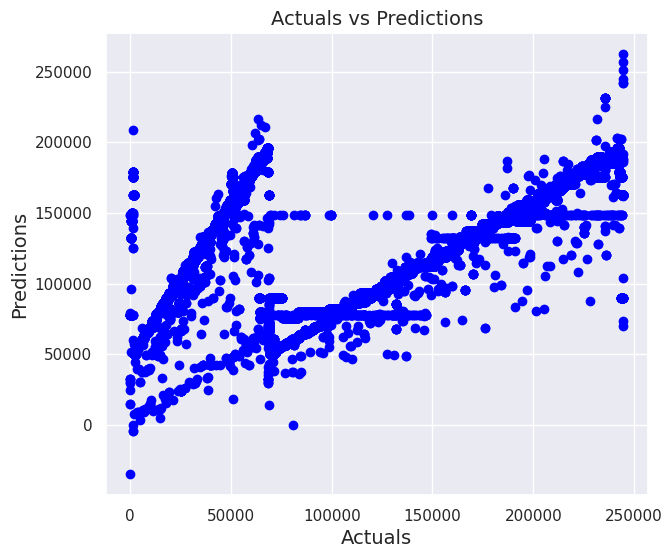

In [65]:
from xgboost import XGBRegressor
score(XGBRegressor)
sns.set(style="darkgrid")

plt.show()